<a href="https://colab.research.google.com/github/pabloclaero/Proyecto_1/blob/main/Proyecto_Pablo_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Parte 1

In [2]:
import pandas as pd
fn = '/content/sales_predictions.csv'
df = pd.read_csv(fn)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Parte 2

1. ¿Cuántas filas y columnas?

In [3]:
filas, columnas = df.shape
print(f"Esta tabla de prediccion de ventas tiene {filas} filas y {columnas} columnas.")

Esta tabla de prediccion de ventas tiene 8523 filas y 12 columnas.


2. ¿Cuáles son los tipos de datos en cada variable?

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [5]:
df.duplicated().sum()

0

4. Identifiquen los valores faltantes.

In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [7]:
median_w = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_w, inplace=True)
print(median_w)

12.6


Rellene los datos faltantes en la colmna 'Item_weight'(peso del Item) con promedio debido a que no valia eliminar las filas porque son demasiados datos faltantes pero tampoco tantos como para eliminart la columna

In [9]:
most_common_size = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(most_common_size, inplace=True)
print(most_common_size)

Medium


Rellene con el el objeto o tamaño mas comun debido a que igual que 'Item_weight' supera el 2% como para eliminar las filas pero no supera el 45% como para eliminar la coumna no quise crear una nueva categoria ya que son muy especificas y ya pore definidas grande, mediano, y pequeño. Y tampoco es que la tienda se pueda auto identifique con otro tamaño como en el sexo de una persona.

6. Confirmen que no hay valores faltantes después de abordarlos.

In [10]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8. Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [15]:
df_1 = pd.DataFrame(df)
resum = df_1.describe()
print(resum)

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count   8523.00000      8523.000000  8523.000000                8523.000000   
mean      12.81342         0.066132   140.992782                1997.831867   
std        4.22724         0.051598    62.275067                   8.371760   
min        4.55500         0.000000    31.290000                1985.000000   
25%        9.31000         0.026989    93.826500                1987.000000   
50%       12.60000         0.053931   143.012800                1999.000000   
75%       16.00000         0.094585   185.643700                2004.000000   
max       21.35000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


##Parte 3

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Histograma para ver las distribuciones de diversas características en el conjunto de datos.

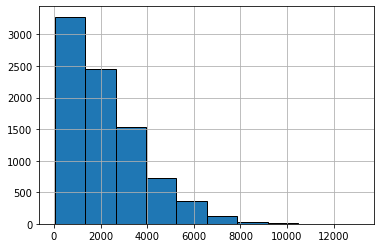

In [23]:
df['Item_Outlet_Sales'].hist(edgecolor='black')
plt.show()

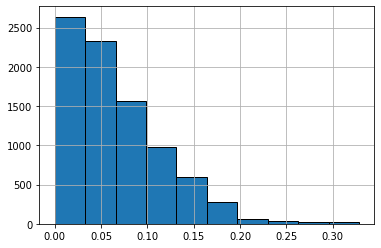

In [20]:
df['Item_Visibility'].hist(edgecolor='black')
plt.show()

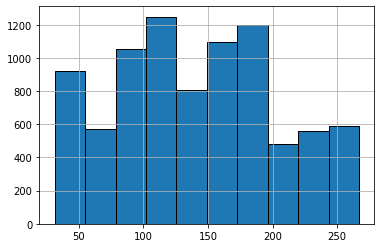

In [26]:
df['Item_MRP'].hist(edgecolor='black')
plt.show()

Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

<AxesSubplot:>

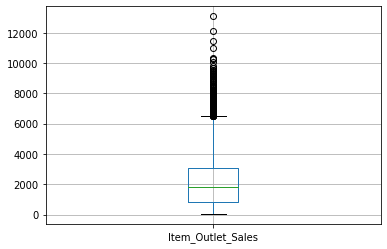

In [47]:
df.boxplot(column = 'Item_Outlet_Sales')

<AxesSubplot:>

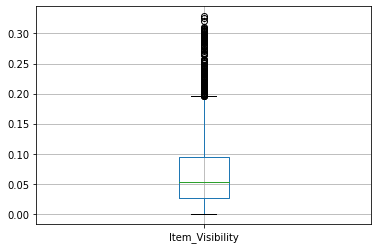

In [38]:
df.boxplot(column = 'Item_Visibility')

<AxesSubplot:>

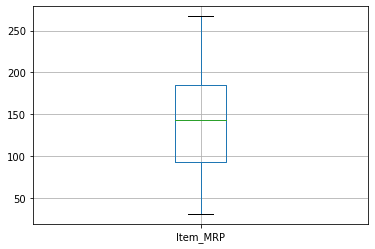

In [30]:
df.boxplot(column = 'Item_MRP')

Mapa de calor de la correlación entre las características.

In [40]:
corr = df.corr()

<AxesSubplot:>

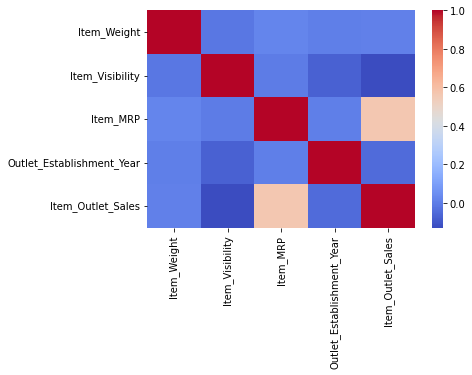

In [41]:
sns.heatmap(corr, cmap='coolwarm')

otros